In [1]:
%reload_ext autoreload
%autoreload 2

In [2]:
from fastai2.tabular.all import *
from fastai2.imports import *

In [90]:
from utils import *

In [82]:
pd.set_option('display.max_rows',100)

In [9]:
path=Path('./data')

TrainAndValid.csv can download from the kaggle competition https://www.kaggle.com/c/bluebook-for-bulldozers/data (TrainAndValid.zip)

In [75]:
df = pd.read_csv(path/'TrainAndValid.csv', low_memory=False)

In [12]:
df.columns

Index(['SalesID', 'SalePrice', 'MachineID', 'ModelID', 'datasource',
       'auctioneerID', 'YearMade', 'MachineHoursCurrentMeter', 'UsageBand',
       'saledate', 'fiModelDesc', 'fiBaseModel', 'fiSecondaryDesc',
       'fiModelSeries', 'fiModelDescriptor', 'ProductSize',
       'fiProductClassDesc', 'state', 'ProductGroup', 'ProductGroupDesc',
       'Drive_System', 'Enclosure', 'Forks', 'Pad_Type', 'Ride_Control',
       'Stick', 'Transmission', 'Turbocharged', 'Blade_Extension',
       'Blade_Width', 'Enclosure_Type', 'Engine_Horsepower', 'Hydraulics',
       'Pushblock', 'Ripper', 'Scarifier', 'Tip_Control', 'Tire_Size',
       'Coupler', 'Coupler_System', 'Grouser_Tracks', 'Hydraulics_Flow',
       'Track_Type', 'Undercarriage_Pad_Width', 'Stick_Length', 'Thumb',
       'Pattern_Changer', 'Grouser_Type', 'Backhoe_Mounting', 'Blade_Type',
       'Travel_Controls', 'Differential_Type', 'Steering_Controls'],
      dtype='object')

### Explore

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412698 entries, 0 to 412697
Data columns (total 53 columns):
SalesID                     412698 non-null int64
SalePrice                   412698 non-null float64
MachineID                   412698 non-null int64
ModelID                     412698 non-null int64
datasource                  412698 non-null int64
auctioneerID                392562 non-null float64
YearMade                    412698 non-null int64
MachineHoursCurrentMeter    147504 non-null float64
UsageBand                   73670 non-null object
saledate                    412698 non-null object
fiModelDesc                 412698 non-null object
fiBaseModel                 412698 non-null object
fiSecondaryDesc             271971 non-null object
fiModelSeries               58667 non-null object
fiModelDescriptor           74816 non-null object
ProductSize                 196093 non-null object
fiProductClassDesc          412698 non-null object
state                      

In [16]:
df.describe()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter
count,4.126980e+05,412698.000000,4.126980e+05,412698.000000,412698.000000,392562.000000,412698.000000,1.475040e+05
mean,2.011161e+06,31215.181414,1.230061e+06,6947.201828,135.169361,6.585268,1899.049637,3.522988e+03
std,1.080068e+06,23141.743695,4.539533e+05,6280.824982,9.646749,17.158409,292.190243,2.716993e+04
min,1.139246e+06,4750.000000,0.000000e+00,28.000000,121.000000,0.000000,1000.000000,0.000000e+00
25%,1.421898e+06,14500.000000,1.088593e+06,3261.000000,132.000000,1.000000,1985.000000,0.000000e+00
50%,1.645852e+06,24000.000000,1.284397e+06,4605.000000,132.000000,2.000000,1995.000000,0.000000e+00
75%,2.261012e+06,40000.000000,1.478079e+06,8899.000000,136.000000,4.000000,2001.000000,3.209000e+03
max,6.333349e+06,142000.000000,2.486330e+06,37198.000000,173.000000,99.000000,2014.000000,2.483300e+06


#### Fix year

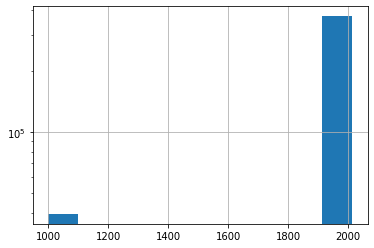

In [25]:
df['YearMade'].hist(log=True)

**1000-th year made** it is definetly NA value, let's fix this

In [76]:
df['YearMade'].replace(1000, np.nan, inplace=True)

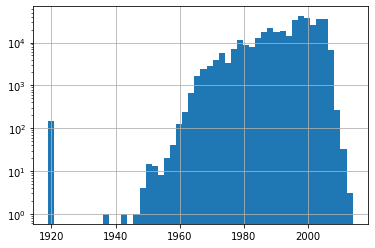

In [31]:
df['YearMade'].hist(bins=50, log=True)

same with 1920-th year

In [77]:
df['YearMade'].replace([1919, 1920], [np.nan, np.nan], inplace=True)

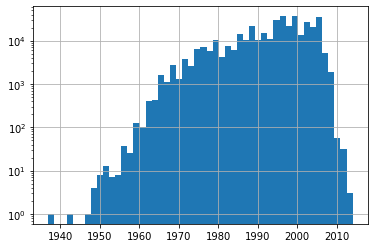

In [78]:
df['YearMade'].hist(bins=50, log=True)

In [33]:
df.describe()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter
count,4.126980e+05,412698.000000,4.126980e+05,412698.000000,412698.000000,392562.000000,373163.000000,1.475040e+05
mean,2.011161e+06,31215.181414,1.230061e+06,6947.201828,135.169361,6.585268,1993.945364,3.522988e+03
std,1.080068e+06,23141.743695,4.539533e+05,6280.824982,9.646749,17.158409,9.578529,2.716993e+04
min,1.139246e+06,4750.000000,0.000000e+00,28.000000,121.000000,0.000000,1937.000000,0.000000e+00
25%,1.421898e+06,14500.000000,1.088593e+06,3261.000000,132.000000,1.000000,1988.000000,0.000000e+00
50%,1.645852e+06,24000.000000,1.284397e+06,4605.000000,132.000000,2.000000,1996.000000,0.000000e+00
75%,2.261012e+06,40000.000000,1.478079e+06,8899.000000,136.000000,4.000000,2001.000000,3.209000e+03
max,6.333349e+06,142000.000000,2.486330e+06,37198.000000,173.000000,99.000000,2014.000000,2.483300e+06


In [37]:
df.sample(5).T

,140173,22509,63135,372011,384292
SalesID,1502227,1217371,1329586,2650769,4313855
SalePrice,28000,63000,12500,67500,28000
MachineID,1539243,564906,1115041,1839725,2295456
ModelID,4155,24028,4089,11399,22057
datasource,132,121,132,149,172
auctioneerID,1,3,2,99,1
YearMade,1977,2003,1987,2005,2000
MachineHoursCurrentMeter,NaN,8877,NaN,1040,3158
UsageBand,NaN,Medium,NaN,Low,Low
saledate,6/18/1991 0:00,9/15/2011 0:00,11/14/2001 0:00,6/16/2011 0:00,7/31/2009 0:00


Let's see what colums are row-unique -- if number of different values is close to the df length it's often not very usefun infomation (if it's not strictly continious value)

In [61]:
def uniqueness(df):
    """
    Shows how many different values each column have
    """
    result = pd.DataFrame(columns=['column', 'uniques', 'uniques %'])
    ln = len(df)
    for col in df:
        uniqs = len(df[col].unique())
        result = result.append({'column':col, 'uniques':uniqs, 'uniques %':uniqs/ln*100}, ignore_index=True)
    return result.sort_values(by='uniques', ascending=False)    

In [59]:
uniqueness(df)

,column,uniques,uniques %
0,SalesID,412698,100.000000
2,MachineID,348808,84.518946
7,MachineHoursCurrentMeter,15634,3.788242
3,ModelID,5281,1.279628
10,fiModelDesc,5059,1.225836
9,saledate,4013,0.972382
11,fiBaseModel,1961,0.475166
1,SalePrice,954,0.231162
12,fiSecondaryDesc,178,0.043131
14,fiModelDescriptor,141,0.034165


For now SalesID and MachineID seems pretty useless as it will be hard for a model to generalize and gather some information out of it as it's different for pretty every row

#### Fix Sale Date

In [79]:
df['saledate'] = pd.to_datetime(df['saledate'], format="%m/%d/%Y %H:%M")

In [80]:
df = add_datepart(df=df, field_name='saledate')

In [83]:
df.sample(5).T

,235477,273744,124899,312616,47964
SalesID,1733773,1816931,1470626,2274353,1290408
SalePrice,30000,41000,22500,30000,16500
MachineID,1375901,1107999,697747,1534259,1098755
ModelID,28234,9865,1528,4139,3177
datasource,132,132,132,136,132
auctioneerID,1,1,1,4,1
YearMade,1981,1984,1994,1980,1992
MachineHoursCurrentMeter,NaN,NaN,NaN,0,NaN
UsageBand,NaN,NaN,NaN,NaN,NaN
fiModelDesc,D455A1,MS280,D3CIIILGP,D7G,580SUPER K


In [91]:
sv_var(var=df, name='dozers', path=path, bzipped=True)